In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F
import gc

In [2]:
IMG_SIZE = (80,80)
char_path = r"C:\Users\admin\Desktop\python_files\the simpsons\simpsons_dataset"

In [3]:
char_dict ={}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

In [4]:
from operator import itemgetter, attrgetter
char_list = list(char_dict.items())
char_list =sorted(char_list, key=itemgetter(1), reverse = True)
char_dict = dict(char_list)

In [5]:
characters =[]
count = 0
for char in char_dict:
    characters.append(char)
    count += 1
    if count >=10:
        break

In [6]:
class Simpsons_dataset(Dataset):
    def __init__(self):
        self.imgs_path =r"C:\Users\admin\Desktop\python_files\the simpsons\simpsons_dataset"
        file_list = [os.path.join(char_path,char) for char in characters]
        #print(file_list)
        self.data = []
        for class_path in file_list:
            class_name = class_path.split("\\")[-1]
            for img_path in [os.path.join(class_path, file) for file in os.listdir(class_path)]:
                self.data.append([img_path,class_name])
                
#         print(self.data)
        self.class_map = {'homer_simpson': 0,
                          'ned_flanders':1,
                          'moe_szyslak':2,
                          'lisa_simpson':3,
                          'bart_simpson':4,
                          'marge_simpson':5,
                          'krusty_the_clown':6,
                          'principal_skinner':7,
                          'charles_montgomery_burns':8,
                          'milhouse_van_houten':9}
        self.img_dim = (80,80)
        
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path,class_name = self.data[idx]
        img = cv.imread(img_path)
        img = cv.resize(img, self.img_dim)
        class_id = self.class_map[class_name]
        img_tensor = torch.from_numpy(img)
        img_tensor = img_tensor.permute(2,0,1)/255.0
#         class_id = torch.tensor([class_id])
#         result = transforms.Compose([
#             transforms.ToPILImage(),
#             transforms.Grayscale(num_output_channels=1),
#             transforms.ToTensor(),
# #             transforms.Normalize([0.5,], [0.5,])
#         ])(img_tensor)

        return img_tensor.float(),class_id


In [7]:
simpsons = Simpsons_dataset()

torch.Size([80, 80, 3])
0


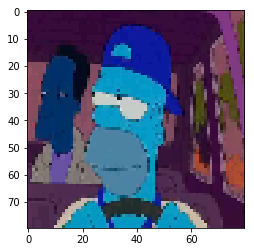

In [8]:
image,label = simpsons[22]
image = image.permute(1,2,0)
print(image.shape)
image = image
plt.imshow(image,cmap = 'gray')
print(label)

In [9]:
val_size = 2811
train_size = len(simpsons) - val_size
train_ds, val_ds = random_split(simpsons,[train_size,val_size])

In [10]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=0,pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=0, pin_memory=True)

images.shape: torch.Size([128, 3, 80, 80])


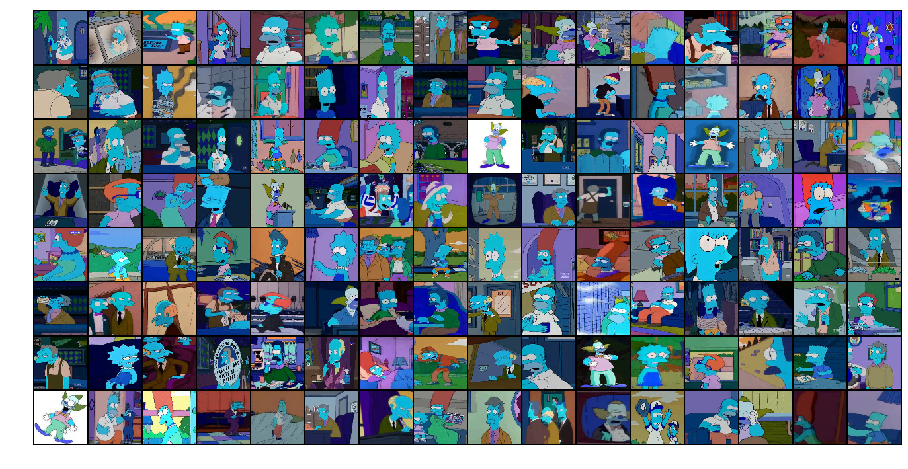

In [11]:
from torchvision.utils import make_grid
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute(1,2,0))
    break
 

torch.Size([128, 3, 80, 80])
torch.Size([384, 6400])
tensor([1, 7, 2, 6, 8, 9, 4, 6, 2, 8, 4, 3, 2, 2, 0, 9, 6, 4, 0, 6, 3, 6, 5, 7,
        3, 3, 8, 6, 3, 9, 2, 6, 5, 4, 1, 0, 1, 1, 4, 5, 0, 4, 6, 5, 0, 5, 2, 6,
        4, 4, 6, 5, 2, 1, 2, 2, 3, 1, 5, 7, 2, 9, 0, 6, 4, 1, 8, 0, 3, 4, 1, 3,
        0, 3, 5, 3, 7, 3, 6, 9, 5, 0, 5, 5, 3, 8, 4, 7, 1, 4, 3, 1, 2, 1, 7, 0,
        3, 8, 4, 0, 8, 0, 5, 7, 5, 2, 0, 9, 0, 5, 3, 9, 2, 3, 2, 0, 4, 4, 5, 6,
        0, 9, 4, 1, 4, 6, 8, 9])


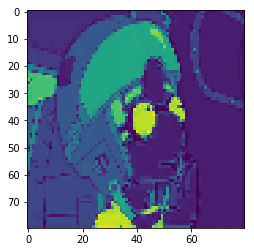

In [12]:
for images, labels in train_loader:
    print(images.shape)
    inputs = images.reshape(-1,6400)
    print(inputs.shape)
    print(labels)
    plt.imshow(images[5][0])
    break

In [13]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size1,hidden_size2, out_size):
        super().__init__()
        
        self.in_size = in_size
       
        # first convontiunal layer
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size = 5, stride = 1, padding=2)
        
        # second convontiunal layer
        self.conv2=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5, stride = 1, padding=2)
        
        #  first linear hidden layer 
        self.linear1 = nn.Linear(in_features=32*20*20,out_features= hidden_size1)
        
        # second linear hidden layer
        self.linear2 = nn.Linear(hidden_size1,hidden_size2)
        
        # out layer
        self.linear3 = nn.Linear(hidden_size2, out_size)
        
        
    def forward(self, xb):
        xb = xb
        
        out = self.conv1(xb)
        out = F.relu(out)
        out = F.max_pool2d(out, kernel_size=2, stride = 2)
        
        out = self.conv2(out)
        out = F.relu(out)
        out = F.max_pool2d(out, kernel_size=2, stride = 2) 
        
        out = out.reshape(-1,32*20*20)
        out = self.linear1(out)
        out = F.relu(out)
        
        out = self.linear2(out)
        out = F.relu(out)
        
        out = self.linear3(out)
#         out = F.relu(out)
        
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [14]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [15]:
input_size = 6400
hidden_size1 = 2000 # you can change this
hidden_size2 = 1000
num_classes = 10

In [16]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size1=hidden_size1,hidden_size2=hidden_size2, out_size=num_classes)

In [17]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.302666664123535
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0119,  0.0127, -0.0399,  0.0463,  0.0087, -0.0066,  0.0150,  0.0011,
         -0.0007,  0.0068],
        [-0.0053,  0.0161, -0.0405,  0.0513,  0.0007, -0.0098,  0.0142, -0.0010,
         -0.0057,  0.0126]])


In [18]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.Adam):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [19]:
history= [evaluate(model,val_loader)]
history

[{'val_loss': 2.304074764251709, 'val_acc': 0.09502755850553513}]

In [20]:
history += fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.4234, val_acc: 0.5198
Epoch [1], val_loss: 0.9781, val_acc: 0.6756
Epoch [2], val_loss: 0.8243, val_acc: 0.7246
Epoch [3], val_loss: 0.7262, val_acc: 0.7833
Epoch [4], val_loss: 0.7456, val_acc: 0.7929


In [21]:
history += fit(5, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7908, val_acc: 0.8075
Epoch [1], val_loss: 0.8505, val_acc: 0.8150
Epoch [2], val_loss: 0.9074, val_acc: 0.8121
Epoch [3], val_loss: 0.9738, val_acc: 0.8118
Epoch [4], val_loss: 1.0409, val_acc: 0.8104


In [1]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    print(xb.size())
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

In [2]:
img, label = simpsons[3323]
plt.imshow(img[0])
print(img[0].shape)
print(predict_image(img,model))

NameError: name 'simpsons' is not defined

In [24]:
simpsons[3323][0].shape

torch.Size([3, 80, 80])

In [25]:
img = 3

In [26]:
img =cv.imread(r"bart2.jpg")
img = cv.resize(img, (80,80))
img = torch.tensor(img)
img = img.permute(2,0,1).unsqueeze(0)
img = img.float()

In [27]:
img[0][0]

tensor([[ 57.,  57.,  57.,  ...,  57.,  57.,  57.],
        [208., 208., 208.,  ..., 207., 208., 208.],
        [207., 207., 208.,  ..., 208., 208., 208.],
        ...,
        [208., 208., 208.,  ..., 208., 208., 208.],
        [208., 208., 208.,  ..., 208., 208., 208.],
        [208., 208., 208.,  ..., 208., 208., 208.]])

torch.Size([1, 3, 80, 80])
3


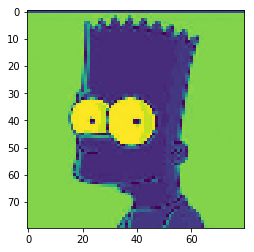

In [28]:
plt.imshow(img[0][0,:,:])
print(predict_image(img[0],model))

In [29]:
img =cv.imread(r"bart.jpg")
img = cv.resize(img, (80,80))

img = torch.tensor(img)
img = img.permute(2,0,1).unsqueeze(0)
img = img.float()


torch.Size([1, 3, 80, 80])
4


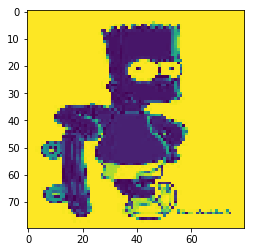

In [30]:
plt.imshow(img[0][0,:,:])
print(predict_image(img[0],model))

In [31]:
img =cv.imread(r"homer.jpg")
img = cv.resize(img, (80,80))
img = torch.tensor(img)
img = img.permute(2,0,1).unsqueeze(0)
img = img.float()

torch.Size([1, 3, 80, 80])
0


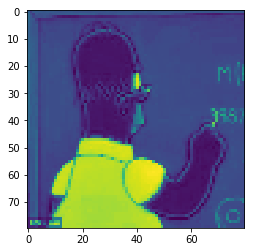

In [32]:
plt.imshow(img[0][0,:,:])
print(predict_image(img[0],model))

In [33]:
img =cv.imread(r"moe.jpg")
img = cv.resize(img, (80,80))
img = torch.tensor(img)
img = img.permute(2,0,1).unsqueeze(0)
img = img.float()

torch.Size([1, 3, 80, 80])
2


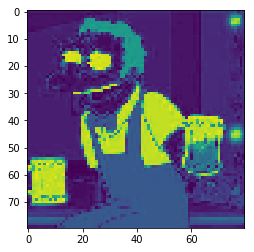

In [34]:
plt.imshow(img[0][0,:,:])
print(predict_image(img[0],model))

In [35]:
img =cv.imread(r"moe2.jpg")
img = cv.resize(img, (80,80))
img = torch.tensor(img)
img = img.permute(2,0,1).unsqueeze(0)
img = img.float()

torch.Size([1, 3, 80, 80])
2


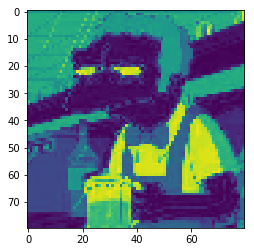

In [36]:
plt.imshow(img[0][0,:,:])
print(predict_image(img[0],model))

In [37]:
img =cv.imread(r"milhouse.jpg")
img = cv.resize(img, (80,80))
img = torch.tensor(img)
img = img.permute(2,0,1).unsqueeze(0)
img = img.float()

torch.Size([1, 3, 80, 80])
9


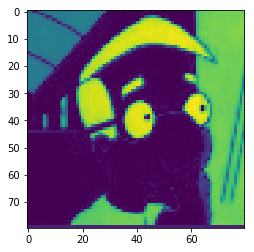

In [38]:
plt.imshow(img[0][0,:,:])
print(predict_image(img[0],model))

In [39]:
img =cv.imread(r"milhouse2.jpg")
img = cv.resize(img, (80,80))
img = torch.tensor(img)
img = img.permute(2,0,1).unsqueeze(0)
img = img.float()

torch.Size([1, 3, 80, 80])
0


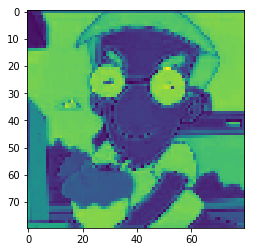

In [40]:
plt.imshow(img[0][0,:,:])
print(predict_image(img[0],model))

In [41]:
img =cv.imread(r"skinner.jpg")
img = cv.resize(img, (80,80))
img = torch.tensor(img)
img = img.permute(2,0,1).unsqueeze(0)
img = img.float()

torch.Size([1, 3, 80, 80])
3


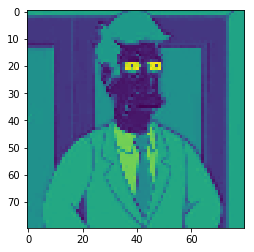

In [42]:
plt.imshow(img[0][0,:,:])
print(predict_image(img[0],model))

In [43]:
img =cv.imread(r"marge.jpg")
img = cv.resize(img, (80,80))
img = torch.tensor(img)
img = img.permute(2,0,1).unsqueeze(0)
img = img.float()

torch.Size([1, 3, 80, 80])
5


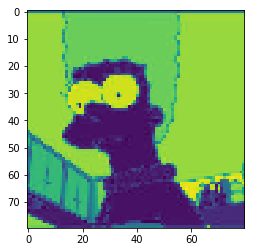

In [44]:
plt.imshow(img[0][0,:,:])
print(predict_image(img[0],model))

In [45]:
img =cv.imread(r"marge2.jpg")
img = cv.resize(img, (80,80))
img = torch.tensor(img)
img = img.permute(2,0,1).unsqueeze(0)
img = img.float()

torch.Size([1, 3, 80, 80])
5


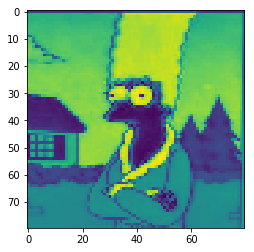

In [46]:
plt.imshow(img[0][0,:,:])
print(predict_image(img[0],model))